In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('corona_case.csv')

In [88]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [89]:
df.tail(5)

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [90]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [91]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [92]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [93]:
df['Date']= pd.to_datetime(df['Date'])

In [94]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [95]:
df.drop('Date',inplace=True,axis=1)

In [96]:
le=LabelEncoder()

In [97]:
df['Country']=le.fit_transform(df['Country'])

In [98]:
df

,Country,Confirmed,Recovered,Deaths,day,month,year
0,0,0,0,0,22,1,2020
1,1,0,0,0,22,1,2020
2,2,0,0,0,22,1,2020
3,3,0,0,0,22,1,2020
4,4,0,0,0,22,1,2020
...,...,...,...,...,...,...,...
23683,183,429,365,3,26,5,2020
23684,184,9,6,1,26,5,2020
23685,185,249,10,49,26,5,2020
23686,186,920,336,7,26,5,2020


In [99]:
df.describe()

,Country,Confirmed,Recovered,Deaths,day,month,year
count,23688.000000,2.368800e+04,23688.000000,23688.000000,23688.000000,23688.000000,23688.0
mean,93.500000,7.969368e+03,2581.801714,526.935030,15.968254,3.261905,2020.0
std,54.271303,5.842109e+04,15143.101257,3992.815956,8.730660,1.242007,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2020.0
25%,46.750000,0.000000e+00,0.000000,0.000000,8.000000,2.000000,2020.0
50%,93.500000,1.800000e+01,1.000000,0.000000,16.000000,3.000000,2020.0
75%,140.250000,7.300000e+02,123.000000,13.000000,24.000000,4.000000,2020.0
max,187.000000,1.680913e+06,384902.000000,98913.000000,31.000000,5.000000,2020.0


In [100]:
dfcor=df.corr()

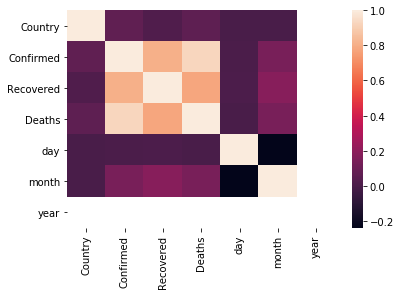

In [101]:
sns.heatmap(dfcor)

In [102]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
day          -0.068932
month        -0.107605
year          0.000000
dtype: float64

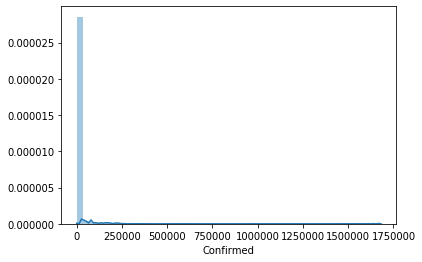

In [103]:
sns.distplot(df['Confirmed'])

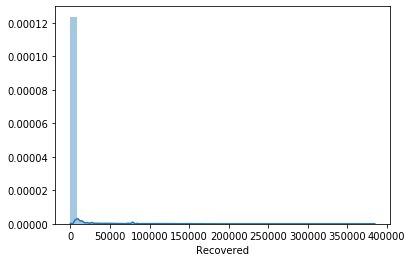

In [104]:
sns.distplot(df['Recovered'])

In [105]:
df

,Country,Confirmed,Recovered,Deaths,day,month,year
0,0,0,0,0,22,1,2020
1,1,0,0,0,22,1,2020
2,2,0,0,0,22,1,2020
3,3,0,0,0,22,1,2020
4,4,0,0,0,22,1,2020
...,...,...,...,...,...,...,...
23683,183,429,365,3,26,5,2020
23684,184,9,6,1,26,5,2020
23685,185,249,10,49,26,5,2020
23686,186,920,336,7,26,5,2020


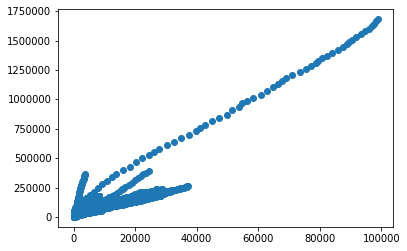

In [106]:
plt.scatter(df['Deaths'],df['Confirmed'])

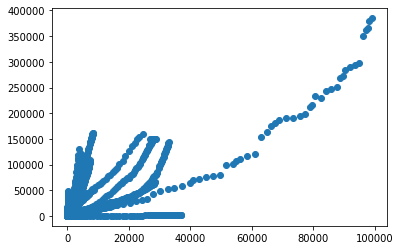

In [107]:
plt.scatter(df['Deaths'],df['Recovered'])

In [108]:
x=df.drop('Deaths',axis=1)
y=df['Deaths']

In [109]:
x

,Country,Confirmed,Recovered,day,month,year
0,0,0,0,22,1,2020
1,1,0,0,22,1,2020
2,2,0,0,22,1,2020
3,3,0,0,22,1,2020
4,4,0,0,22,1,2020
...,...,...,...,...,...,...
23683,183,429,365,26,5,2020
23684,184,9,6,26,5,2020
23685,185,249,10,26,5,2020
23686,186,920,336,26,5,2020


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=44)

In [111]:
x_train.shape

(18950, 6)

In [112]:
x_test.shape

(4738, 6)

In [113]:
y_train.shape

(18950,)

In [114]:
LR=LinearRegression()

In [115]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
LR.intercept_

-75.31519302706579

In [117]:
LR.coef_

array([1.67535012e-01, 6.03889382e-02, 1.49093267e-02, 3.80431091e-01,
       1.95436694e+01, 0.00000000e+00])

In [118]:
LR.score(x_train,y_train)

0.8719559288313218

In [119]:
pred=LR.predict(x_test)
print("Predicted by machine",pred)
print("Actual price",y_test)

Predicted by machine [110.54794772 -31.76731257  53.47000442 ... -13.60035174  52.46065335
 580.6465041 ]
Actual price 21611     19
2833       0
21576      0
7749       0
10830      1
        ... 
8774       0
5812       0
4613       0
22478      3
19589    378
Name: Deaths, Length: 4738, dtype: int64


In [120]:
print("Errors:")
print("Mean Squered",mean_squared_error(y_test,pred))
print("Mean absulate",mean_absolute_error(y_test,pred))
print("RMS",np.sqrt(mean_squared_error(y_test,pred)))

Errors:
Mean Squered 2042797.4387884024
Mean absulate 276.66276315528177
RMS 1429.2646496672344


In [121]:
r2_score(y_test,pred)

0.8334910920079843

In [122]:
from sklearn.model_selection import cross_val_score
dtscore=cross_val_score(LR,x,y,cv=4)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [-1.10276457  0.42069981  0.81495616  0.87149557]
0.2510967436900542 0.8007087184694436
